<a href="https://colab.research.google.com/github/saivenkatreddy29/TensorFlow-Learning/blob/main/Multiclass_Classification_using_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-07-18 06:03:26--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.207, 172.253.118.207, 74.125.200.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  19.6MB/s    in 28s     

2024-07-18 06:03:54 (17.8 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

There are 2 directories and 0 images in 10_food_classes_all_data
There are 10 directories and 0 images in 10_food_classes_all_data/train
There are 0 directories and 750 images in 10_food_classes_all_data/train/grilled_salmon
There are 0 directories and 750 images in 10_food_classes_all_data/train/pizza
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_curry
There are 0 directories and 750 images in 10_food_classes_all_data/train/hamburger
There are 0 directories and 750 images in 10_food_classes_all_data/train/ice_cream
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_wings
There are 0 directories and 750 images in 10_food_classes_all_data/train/ramen
There are 0 directories and 750 images in 10_food_classes_all_data/train/fried_rice
There are 0 directories and 750 images in 10_food_classes_all_data/train/sushi
There are 0 directories and 750 images in 10_food_classes_all_data/train/steak
There are 10 directories and 0 imag

In [ ]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def random_image(target_dir, target_class):
  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f"image shape is {img.shape}")

  return img

In [ ]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['3192300.jpg']
image shape is (512, 512, 3)


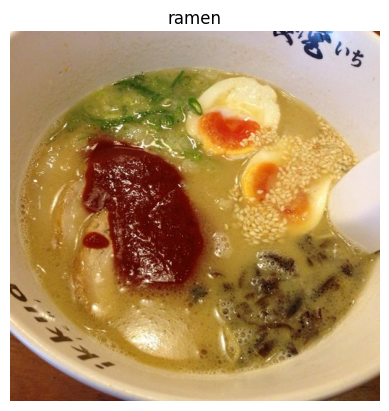

In [ ]:
import random
img = random_image(target_dir = train_dir,
                   target_class = random.choice(class_names))

# **Preproces the data**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

train_data = train_datagen.flow_from_directory(train_dir, target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = 'categorical')

test_data = test_datagen.flow_from_directory(test_dir, target_size = (224,224),
                                             batch_size = 32,
                                             class_mode = 'categorical')


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


# **Create a model**

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,Flatten
from tensorflow.keras.optimizers import Adam

In [ ]:
model1= Sequential([

     Conv2D(10,3,input_shape = (224,224,3), activation = 'relu'),
     Conv2D(10,3,activation = 'relu'),
     MaxPool2D(2),
     Conv2D(10,3, activation = 'relu'),
     Conv2D(10,3,activation = 'relu'),
     MaxPool2D(2),
     Flatten(),
     Dense(len(class_names),'softmax')


])

In [ ]:
model1.compile(loss= 'categorical_crossentropy', optimizer = Adam(), metrics = ['accuracy'])

In [ ]:
model1.fit(train_data,epochs = 5, validation_data = test_data,
           steps_per_epoch = len(train_data),
           validation_steps = len(test_data))

Epoch 1/5
 66/235 [=======>......................] - ETA: 18s - loss: 2.2782 - accuracy: 0.1415

KeyboardInterrupt: 

# **Next Model**
Increase max pool and epochs


In [ ]:
model2= Sequential([

     Conv2D(10,3,input_shape = (224,224,3), activation = 'relu'),
     MaxPool2D(2),
     Conv2D(10,3,activation = 'relu'),
     MaxPool2D(2),
     Conv2D(10,3, activation = 'relu'),
     MaxPool2D(2),
     Conv2D(10,3,activation = 'relu'),
     MaxPool2D(2),
     Flatten(),
     Dense(len(class_names),'softmax')


])

In [ ]:
model2.compile(loss= 'categorical_crossentropy', optimizer = Adam(), metrics = ['accuracy'])

In [ ]:
model2.fit(train_data,epochs = 10, validation_data = test_data,
           steps_per_epoch = len(train_data),
           validation_steps = len(test_data))

Epoch 1/10
235/235 [==============================] - 28s 112ms/step - loss: 2.1523 - accuracy: 0.2104 - val_loss: 2.0109 - val_accuracy: 0.2776
Epoch 2/10
235/235 [==============================] - 27s 115ms/step - loss: 1.9294 - accuracy: 0.3243 - val_loss: 1.8867 - val_accuracy: 0.3320
Epoch 3/10
235/235 [==============================] - 26s 112ms/step - loss: 1.8148 - accuracy: 0.3705 - val_loss: 1.8803 - val_accuracy: 0.3416
Epoch 4/10
235/235 [==============================] - 28s 119ms/step - loss: 1.7326 - accuracy: 0.4020 - val_loss: 1.8443 - val_accuracy: 0.3708
Epoch 5/10
235/235 [==============================] - 28s 117ms/step - loss: 1.6628 - accuracy: 0.4240 - val_loss: 1.9062 - val_accuracy: 0.3396
Epoch 6/10
235/235 [==============================] - 26s 111ms/step - loss: 1.5943 - accuracy: 0.4479 - val_loss: 1.8951 - val_accuracy: 0.3452
Epoch 7/10
235/235 [==============================] - 27s 117ms/step - loss: 1.5184 - accuracy: 0.4779 - val_loss: 1.8991 - val_ac

Remove CNN layers

In [ ]:
model3= Sequential([

     Conv2D(10,3,input_shape = (224,224,3), activation = 'relu'),
     MaxPool2D(2),
     Conv2D(10,3,activation = 'relu'),
     MaxPool2D(2),
     Flatten(),
     Dense(len(class_names),'softmax')


])

In [ ]:
model3.compile(loss= 'categorical_crossentropy', optimizer = Adam(), metrics = ['accuracy'])

In [ ]:
model3.fit(train_data,epochs = 10, validation_data = test_data,
           steps_per_epoch = len(train_data),
           validation_steps = len(test_data))

Epoch 1/10
235/235 [==============================] - 28s 116ms/step - loss: 2.1533 - accuracy: 0.2299 - val_loss: 2.0485 - val_accuracy: 0.2736
Epoch 2/10
235/235 [==============================] - 28s 118ms/step - loss: 1.7347 - accuracy: 0.4155 - val_loss: 1.9315 - val_accuracy: 0.3088
Epoch 3/10
235/235 [==============================] - 28s 117ms/step - loss: 1.2459 - accuracy: 0.5969 - val_loss: 2.1740 - val_accuracy: 0.3024
Epoch 4/10
235/235 [==============================] - 27s 117ms/step - loss: 0.7184 - accuracy: 0.7849 - val_loss: 2.5832 - val_accuracy: 0.2800
Epoch 5/10
235/235 [==============================] - 27s 117ms/step - loss: 0.3615 - accuracy: 0.9047 - val_loss: 3.0893 - val_accuracy: 0.2796
Epoch 6/10
235/235 [==============================] - 27s 114ms/step - loss: 0.1776 - accuracy: 0.9607 - val_loss: 3.7333 - val_accuracy: 0.2740
Epoch 7/10
235/235 [==============================] - 27s 116ms/step - loss: 0.0815 - accuracy: 0.9840 - val_loss: 4.4416 - val_ac

# **Model 4**

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

train_data = train_datagen.flow_from_directory(train_dir, target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = 'categorical')

test_data = test_datagen.flow_from_directory(test_dir, target_size = (224,224),
                                             batch_size = 32,
                                             class_mode = 'categorical')


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


Remove CNN layers

In [ ]:
model3= Sequential([

     Conv2D(10,3,input_shape = (224,224,3), activation = 'relu'),
     MaxPool2D(2),
     Conv2D(10,3,activation = 'relu'),
     MaxPool2D(2),
     Flatten(),
     Dense(len(class_names),'softmax')


])

In [ ]:
model3.compile(loss= 'categorical_crossentropy', optimizer = Adam(), metrics = ['accuracy'])

In [ ]:
model3.fit(train_data,epochs = 10, validation_data = test_data,
           steps_per_epoch = len(train_data),
           validation_steps = len(test_data))

Epoch 1/10
235/235 [==============================] - 28s 116ms/step - loss: 2.1533 - accuracy: 0.2299 - val_loss: 2.0485 - val_accuracy: 0.2736
Epoch 2/10
235/235 [==============================] - 28s 118ms/step - loss: 1.7347 - accuracy: 0.4155 - val_loss: 1.9315 - val_accuracy: 0.3088
Epoch 3/10
235/235 [==============================] - 28s 117ms/step - loss: 1.2459 - accuracy: 0.5969 - val_loss: 2.1740 - val_accuracy: 0.3024
Epoch 4/10
235/235 [==============================] - 27s 117ms/step - loss: 0.7184 - accuracy: 0.7849 - val_loss: 2.5832 - val_accuracy: 0.2800
Epoch 5/10
235/235 [==============================] - 27s 117ms/step - loss: 0.3615 - accuracy: 0.9047 - val_loss: 3.0893 - val_accuracy: 0.2796
Epoch 6/10
235/235 [==============================] - 27s 114ms/step - loss: 0.1776 - accuracy: 0.9607 - val_loss: 3.7333 - val_accuracy: 0.2740
Epoch 7/10
235/235 [==============================] - 27s 116ms/step - loss: 0.0815 - accuracy: 0.9840 - val_loss: 4.4416 - val_ac

In [ ]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [ ]:
import tensorflow as tf

In [ ]:
# Clone the model (use the same architecture)
model4 = tf.keras.models.clone_model(model3)

# Compile the cloned model (same setup as used for model_10)
model4.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history4 = model4.fit(train_data_augmented, # use augmented data
                          epochs=10,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/10
235/235 [==============================] - 105s 436ms/step - loss: 2.2016 - accuracy: 0.1973 - val_loss: 2.0448 - val_accuracy: 0.2716
Epoch 2/10
235/235 [==============================] - 103s 437ms/step - loss: 2.0867 - accuracy: 0.2577 - val_loss: 2.0009 - val_accuracy: 0.3024
Epoch 3/10
235/235 [==============================] - 103s 440ms/step - loss: 2.0549 - accuracy: 0.2765 - val_loss: 1.9477 - val_accuracy: 0.3168
Epoch 4/10
235/235 [==============================] - 103s 438ms/step - loss: 2.0393 - accuracy: 0.2893 - val_loss: 1.8805 - val_accuracy: 0.3448
Epoch 5/10
235/235 [==============================] - 104s 442ms/step - loss: 1.9863 - accuracy: 0.3131 - val_loss: 1.8546 - val_accuracy: 0.3756
Epoch 6/10
235/235 [==============================] - 105s 444ms/step - loss: 1.9517 - accuracy: 0.3215 - val_loss: 1.8378 - val_accuracy: 0.3596
Epoch 7/10
235/235 [==============================] - 103s 439ms/step - loss: 1.9449 - accuracy: 0.3313 - val_loss: 1.8776 -

# **Final working model**

In [ ]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model4 = Sequential([
    Conv2D(100, (3, 3), input_shape=(224, 224, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(100, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(100, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(100, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(100, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(100, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(len(class_names), activation='softmax')
])

# Print the model summary
model4.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 222, 222, 100)     2800      
                                                                 
 max_pooling2d_35 (MaxPooli  (None, 111, 111, 100)     0         
 ng2D)                                                           
                                                                 
 conv2d_40 (Conv2D)          (None, 109, 109, 100)     90100     
                                                                 
 max_pooling2d_36 (MaxPooli  (None, 54, 54, 100)       0         
 ng2D)                                                           
                                                                 
 conv2d_41 (Conv2D)          (None, 52, 52, 100)       90100     
                                                                 
 max_pooling2d_37 (MaxPooli  (None, 26, 26, 100)      

In [ ]:


# Compile the cloned model (same setup as used for model_10)
model4.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])



In [ ]:
# Fit the model
history4 = model4.fit(train_data_augmented, # use augmented data
                          epochs=30,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/30
235/235 [==============================] - 125s 506ms/step - loss: 2.2528 - accuracy: 0.1528 - val_loss: 2.1613 - val_accuracy: 0.2212
Epoch 2/30
235/235 [==============================] - 117s 499ms/step - loss: 2.1767 - accuracy: 0.1940 - val_loss: 2.0800 - val_accuracy: 0.2312
Epoch 3/30
235/235 [==============================] - 121s 517ms/step - loss: 2.1069 - accuracy: 0.2347 - val_loss: 1.9353 - val_accuracy: 0.3208
Epoch 4/30
235/235 [==============================] - 121s 515ms/step - loss: 2.0391 - accuracy: 0.2632 - val_loss: 1.8701 - val_accuracy: 0.3488
Epoch 5/30
235/235 [==============================] - 120s 510ms/step - loss: 1.9779 - accuracy: 0.3015 - val_loss: 1.7672 - val_accuracy: 0.3816
Epoch 6/30
235/235 [==============================] - 120s 512ms/step - loss: 1.9093 - accuracy: 0.3351 - val_loss: 1.7214 - val_accuracy: 0.4188
Epoch 7/30
235/235 [==============================] - 118s 503ms/step - loss: 1.8486 - accuracy: 0.3536 - val_loss: 1.6872 -